In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
def display(img, mask = 'gray'):
        fig=plt.figure(figsize=(12,10))
        ax=fig.add_subplot(111)
        ax.imshow(img , cmap='gray')

In [3]:
img1 = cv2.cvtColor(cv2.imread('10.png') , cv2.COLOR_BGR2GRAY)
img2 = cv2.cvtColor(cv2.imread('11.jpg') , cv2.COLOR_BGR2GRAY)

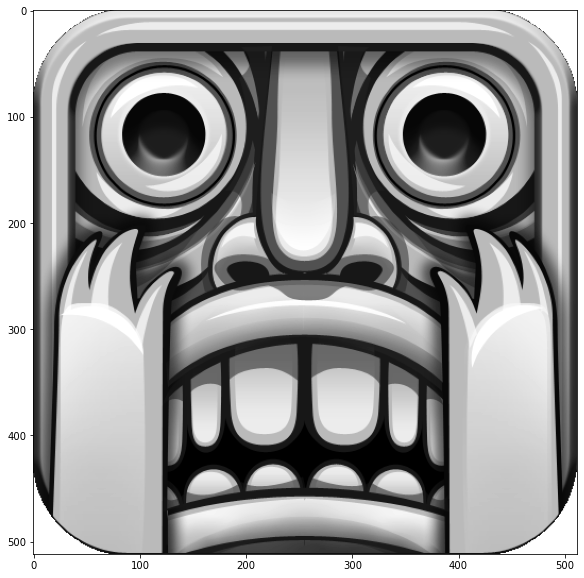

In [4]:
display(img1)

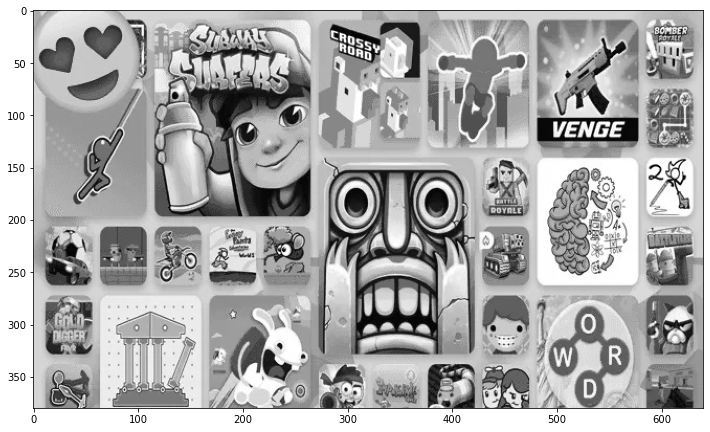

In [5]:
display(img2)

In [6]:
# 1 Creat ORB
orb = cv2.ORB_create(nfeatures=100000 , scoreType=cv2.ORB_FAST_SCORE, edgeThreshold=15, patchSize=31, nlevels=8, fastThreshold=20)
#
# nfeatures: The maximum number of features to retain.
#
# scoreType: The default HARRIS_SCORE means that Harris algorithm is used to rank features (the score is written to KeyPoint::score and is used to
# retain best nfeatures features); FAST_SCORE is alternative value of the parameter that produces slightly less stable keypoints, but it is a little
# faster to compute.
#
# edgeThreshold: This is size of the border where the features are not detected. It should roughly match the patchSize parameter.
#
# patchSize: size of the patch used by the oriented BRIEF descriptor. Of course, on smaller pyramid layers the perceived image area covered by a
# feature will be larger.
#
# nlevels: The number of pyramid levels. The smallest level will have linear size equal to input_image_linear_size/pow(scaleFactor, nlevels).


In [7]:
# 2 getting img details
keb1 , des1 = orb.detectAndCompute( img1 , None )
keb2 , des2 = orb.detectAndCompute( img2 , None )

In [8]:
# 3 making matcher BFMatcher
bf = cv2.BFMatcher(cv2.NORM_HAMMING , crossCheck =False)

In [9]:
# 4 matching process
match = bf.match(des1, des2 ) 

In [10]:
# 5 ording the match result
matches = sorted(match , key =lambda x:x.distance) 

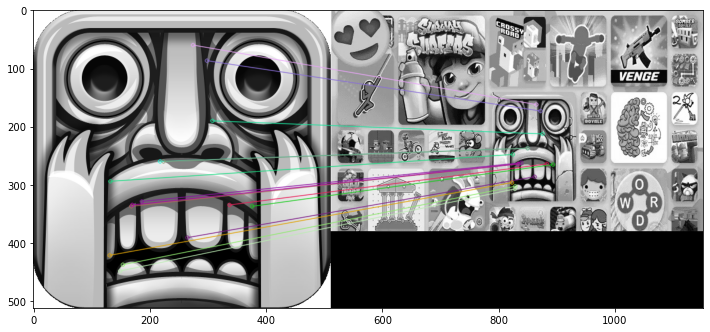

In [11]:
# 6 drawing the result matching 
drawing = cv2.drawMatches(img1 , keb1 ,img2,keb2 ,matches[:15] , None , flags=2)
display(drawing)

In [12]:
# the ORB again found which part of first image match with second image

In [13]:
# another match 


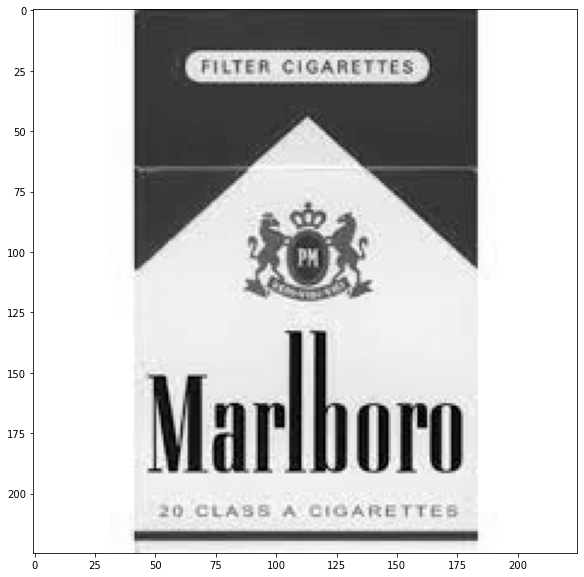

In [14]:
img3 = cv2.cvtColor(cv2.imread('1.jpg') , cv2.COLOR_BGR2GRAY)
display(img3)

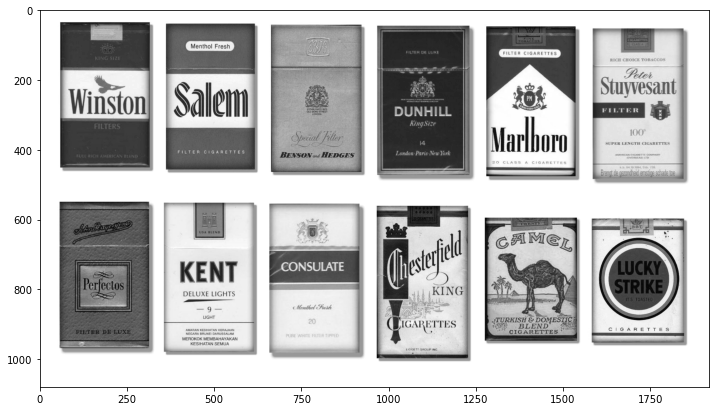

In [15]:
img4=cv2.cvtColor(cv2.imread('1_2.jpg') , cv2.COLOR_BGR2GRAY)
display(img4)

In [16]:
keb3 , des3 = orb.detectAndCompute(img3 , None)
keb4 , des4 = orb.detectAndCompute(img4 , None)

In [17]:
match2 = bf.match( des3 , des4)

In [18]:
matches2 = sorted(match2 , key= lambda x:x.distance)

In [19]:
drawing2 = cv2.drawMatches(img3,keb3 , img4, keb4 , matches2[:15] ,None , flags=2)

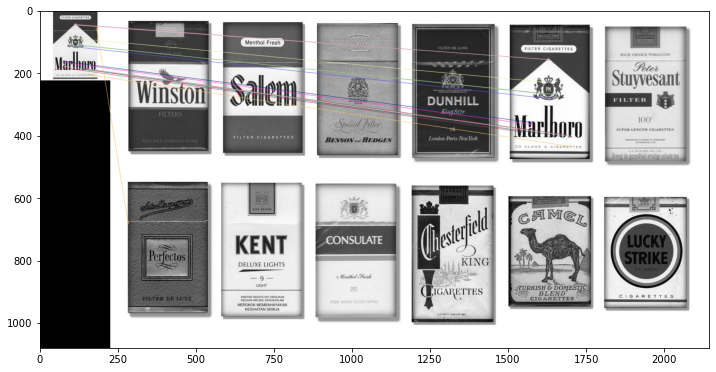

In [20]:
display(drawing2)

In [21]:
# the ORB again found which part of third image match with fourth image